In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("C:\\Users\\zkyaf\\Downloads\\archive (9)\\IRIS.csv")

In [3]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [5]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
df.shape

(150, 5)

In [8]:
df['species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

In [9]:
df['species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [10]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

<Axes: >

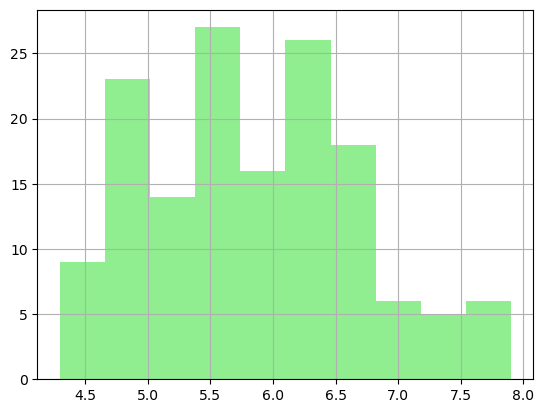

In [11]:
df['sepal_length'].hist(color='lightgreen')

<Axes: >

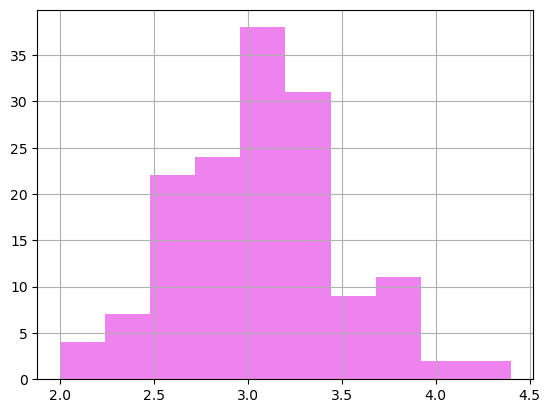

In [12]:
df['sepal_width'].hist(color='violet')

<Axes: >

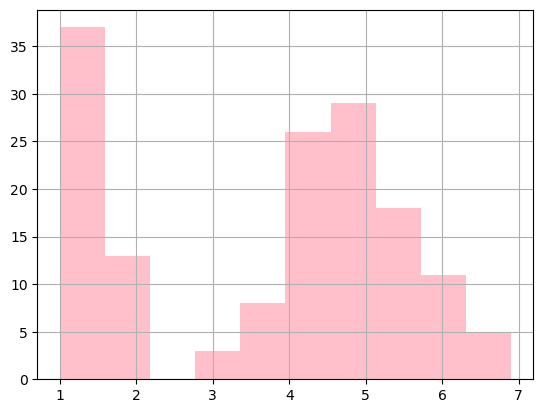

In [13]:
df['petal_length'].hist(color='pink')

<Axes: >

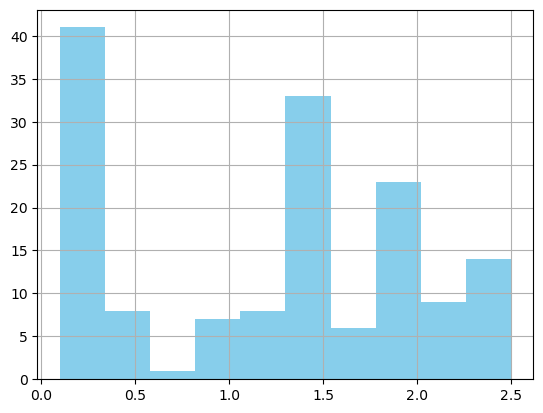

In [14]:
df['petal_width'].hist(color='skyblue')

In [15]:
df.corr()

C:\Users\zkyaf\AppData\Local\Temp\ipykernel_13612\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


C:\Users\zkyaf\AppData\Local\Temp\ipykernel_13612\2699745944.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=df.corr()


<Axes: >

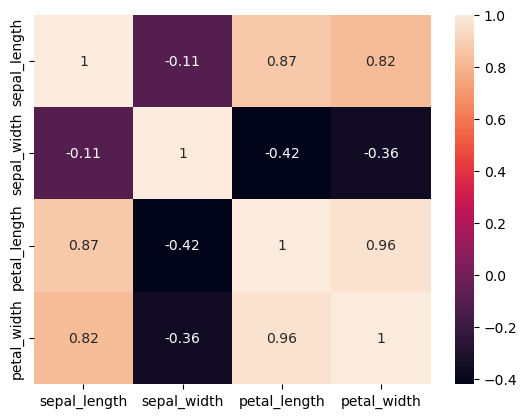

In [16]:
corr=df.corr()
sns.heatmap(corr,annot=True)

In [17]:
from sklearn.preprocessing import LabelEncoder

In [18]:
l=LabelEncoder()
df['species']=l.fit_transform(df['species'])

In [19]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [20]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [23]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [24]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30)

In [25]:
#KNN classifier

knn=KNeighborsClassifier(n_neighbors=7)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [26]:
predict=knn.predict(x_test)
print(predict)

[2 2 2 0 0 1 1 2 0 1 1 1 1 2 2 1 2 1 1 1 1 1 2 0 0 1 1 2 1 1 0 2 2 0 1 2 2
 1 0 0 2 0 0 0 0]


In [27]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, confusion_matrix, precision_score

con_metrix=confusion_matrix(y_test,predict)
print("confusion metrix\n")
print(con_metrix)

confusion metrix

[[13  0  0]
 [ 0 18  1]
 [ 0  0 13]]


In [28]:
acc=round(accuracy_score(y_test,predict)*100,2)
prec=round(precision_score(y_test,predict,average="macro")*100,2)
recall=round(recall_score(y_test,predict,average="macro")*100,2)
f=round(f1_score(y_test,predict,average="macro")*100,2)

print("accuracy matrix: ",acc)
print("precision matrix: ",prec)
print("recall matrix: ",recall)
print("f1 score: ",f)

accuracy matrix:  97.78
precision matrix:  97.62
recall matrix:  98.25
f1 score:  97.86


In [29]:
#Logistic Regression

from sklearn.linear_model import LogisticRegression

In [30]:
lr=LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [31]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30)

predict=knn.predict(x_test)
print(predict)

[2 1 0 2 0 0 1 2 0 1 1 1 1 1 0 1 0 2 1 1 0 1 1 0 1 1 1 2 2 0 1 0 0 2 2 0 1
 2 1 1 1 2 0 1 0]


In [32]:
con_metrix=confusion_matrix(y_test,predict)
print("confusion metrix\n")
print(con_metrix)

confusion metrix

[[14  0  0]
 [ 0 21  0]
 [ 0  0 10]]


In [33]:
acc=round(accuracy_score(y_test,predict)*100,2)
prec=round(precision_score(y_test,predict,average="macro")*100,2)
recall=round(recall_score(y_test,predict,average="macro")*100,2)
f=round(f1_score(y_test,predict,average="macro")*100,2)

print("accuracy matrix: ",acc)
print("precision matrix: ",prec)
print("recall matrix: ",recall)
print("f1 score: ",f)

accuracy matrix:  100.0
precision matrix:  100.0
recall matrix:  100.0
f1 score:  100.0


In [34]:
#Dicision Tree

from sklearn.tree import DecisionTreeClassifier

In [35]:
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [36]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30)

predict=knn.predict(x_test)
print(predict)

[1 2 2 1 2 1 1 1 1 2 2 2 0 1 0 2 0 2 2 2 2 2 0 0 0 0 1 2 0 0 1 1 0 0 2 2 2
 1 0 0 2 2 2 1 1]


In [37]:
con_metrix=confusion_matrix(y_test,predict)
print("confusion metrix\n")
print(con_metrix)

confusion metrix

[[13  0  0]
 [ 0 13  1]
 [ 0  0 18]]


In [38]:
acc=round(accuracy_score(y_test,predict)*100,2)
prec=round(precision_score(y_test,predict,average="macro")*100,2)
recall=round(recall_score(y_test,predict,average="macro")*100,2)
f=round(f1_score(y_test,predict,average="macro")*100,2)

print("accuracy matrix: ",acc)
print("precision matrix: ",prec)
print("recall matrix: ",recall)
print("f1 score: ",f)

accuracy matrix:  97.78
precision matrix:  98.25
recall matrix:  97.62
f1 score:  97.86
